# 🛍️ Walmart : predict weekly sales 🛍️
Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## 🎯 Goals 
The project can be divided into three steps:

* Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
* Part 2 : train a linear regression model (baseline)
* Part 3 : avoid overfitting by training a regularized regression model

## 📚 Imports and installations

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")

## Part 1 : EDA and data preprocessing
### 🔍 EDA

In [ ]:
df = pd.read_csv('https://julie-2-next-resources.s3.eu-west-3.amazonaws.com/full-stack-full-time/projects-supervised-machine-learning-ft/walmart-sales-ft/Walmart_Store_sales.csv')

Dataset description

In [ ]:
print(f"Number of rows : {df.shape[0]}")
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

### Dropping lines where target values are missing

In [ ]:
print(f"number of rows before removing missing values in label column : {df.shape[0]}")
df.dropna(subset=['Weekly_Sales'], inplace=True)
print(f"number of rows after removing missing values in label column : {df.shape[0]}")

number of rows before removing missing values in label column : 150
number of rows after removing missing values in label column : 136


### Create usable features from the Date column

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Day'] = df['Date'].apply(lambda x: x.day)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Day_of_week'] = df['Date'].apply(lambda x: x.weekday())
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Day_of_week
Date,,,,,,,,,,,
2010-02-05,3.0,461622.22,0.0,45.71,2.572,214.424881,7.368,5.0,2.0,2010.0,4.0
2010-02-12,1.0,1641957.44,1.0,38.51,2.548,211.242170,8.106,12.0,2.0,2010.0,4.0
2010-02-12,8.0,994801.40,1.0,33.34,2.548,214.621419,6.299,12.0,2.0,2010.0,4.0
2010-02-19,15.0,660838.75,0.0,NaN,2.909,131.637000,NaN,19.0,2.0,2010.0,4.0
2010-02-19,2.0,2124451.54,0.0,39.69,2.514,210.945160,NaN,19.0,2.0,2010.0,4.0


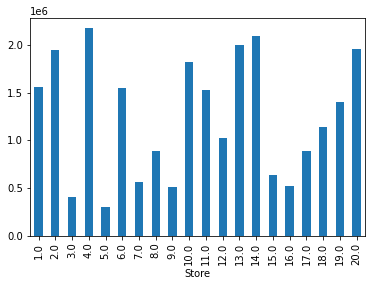

In [ ]:
df.groupby(['Store'])['Weekly_Sales'].mean().plot.bar()

In [ ]:
df['Day_of_week'].value_counts()

4.0    118
Name: Day_of_week, dtype: int64

In [ ]:
# All dayweeks are friday so let's drop this column
df = df.drop('Day_of_week', axis=1)

### Dropping lines containing invalid values or outliers

In [ ]:
print(f"number of rows before removing invalid values or outliers : {df.shape[0]}")
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    mask = (df[col] < df[col].mean() + 3*df[col].std()) & (df[col] > df[col].mean() - 3*df[col].std()) | (df[col].isnull())
    df = df[mask]
df.reset_index(drop = True, inplace=True)
print(f"number of rows after removing invalid values or outliers : {df.shape[0]}")

number of rows before removing invalid values or outliers : 136
number of rows after removing invalid values or outliers : 131


### Visualization of correlation or pairwise dependencies between variables

In [ ]:
corr_matrix = df.corr().round(2)
fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())
fig.show()

### ⚙️ Preprocessings 

In [ ]:
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = df.loc[:,target_name]
X = df.drop(target_name, axis = 1) 
print("...Done.")

Separating labels from features...
...Done.


In [ ]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("...Done.")

Dividing into train and test sets...
...Done.


In [ ]:
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day'] 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
    ])

categorical_features = ['Store', 'Holiday_Flag'] 
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore')) 
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')

print("Performing preprocessings on test set...") 
X_test = preprocessor.transform(X_test) 
print('...Done.')

Performing preprocessings on train set...
...Done.
Performing preprocessings on test set...
...Done.


## 📈 Part 2 : Baseline model (linear regression)

In [ ]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


### 💯 Model performance metrics

In [ ]:
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9736478628873081
R2 score on test set :  0.9182464495904783


### 📊 Feature importance visualization

In [ ]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: 
    if name == 'num': 
        features = features_list 
    else: 
        features = pipeline.named_steps['encoder'].get_feature_names_out() 
    column_names.extend(features) 
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_20.0', 'x1_1.0']


In [ ]:
coefs = pd.DataFrame(index = (column_names), data = regressor.coef_.transpose(), columns=['coefficients'])
feature_importance = abs(coefs).sort_values(by='coefficients')
feature_importance.head()

,coefficients
Fuel_Price,15978.419181
Day,32202.552096
Year,32710.346819
x1_1.0,35164.760000
Temperature,41452.499168


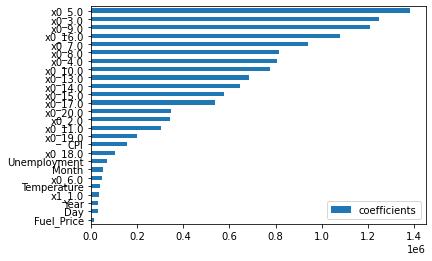

In [ ]:
feature_importance.plot(kind='barh')

## 👮 Part 3 : Fight overfitting

### Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
print('R2 on train: ', ridge.score(X_train, Y_train))
print('R2 on test: ', ridge.score(X_test, Y_test))
scores = cross_val_score(ridge, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

R2 on train:  0.9347978464487467
R2 on test:  0.8808316421784123
The cross-validated R2-score is :  0.8327902835668402
The standard deviation is :  0.0541390593353295


### Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train, Y_train)
print('R2 on train: ', lasso.score(X_train, Y_train))
print('R2 on test: ', lasso.score(X_test, Y_test))
scores = cross_val_score(lasso, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

R2 on train:  0.9736478600249326
R2 on test:  0.9182925528079735
The cross-validated R2-score is :  0.925473874766784
The standard deviation is :  0.04791317777907026


## ➕ Bonus question

### Ridge Gridsearch

In [ ]:
print("Grid search...")
gridsearch = GridSearchCV(ridge, param_grid = {'alpha': [0.0, 0.001, 0.01]}, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.9254756530772802


The best value found for alpha is 0 so there is no need to make a regularization

### Lasso Gridsearch

In [ ]:
print("Grid search...")
gridsearch = GridSearchCV(lasso, param_grid = {'alpha': [0.0, 0.1, 0.5, 1.0]}, cv = 5)
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.9254756530091359
